Example using sigfeat framework
===============================

In [52]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


First we need a test signal:

In [53]:
numsamples = 10 * 1024
samplerate = 16000

t = linspace(0, numsamples/samplerate, numsamples)
x = (1 + sin(2*pi*10*t) + sin(2*pi*14*t)) * randn(numsamples)

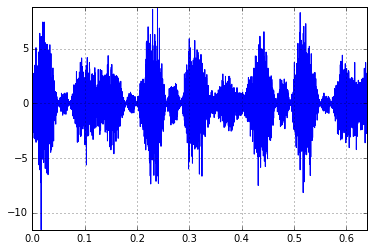

In [54]:
plot(t, x)
grid(True)
axis('tight');

Import Sigfeat stuff
--------------------

In [49]:
from sigfeat.source import ArraySource
from sigfeat.sink import DefaultDictSink
from sigfeat.feature import Feature, FeatureSet, hide
from sigfeat.extractor import Extractor

1. Define Features
------------------

In [21]:
class BlockPosition(Feature):
    def process(self, **bd):
        return bd['index'] + int(0.5 * bd['source'].blocksize)


class RMS(Feature):
    # Square and Mean could be own features and requirements of this feature
    def process(self, block, **data):
        return np.sqrt(np.mean(block**2, axis=0))  


class Abs(Feature):
    def process(self, block, **data):
        return np.abs(block)


class AbsMax(Feature):
    def requires(self):
        return [hide(Abs())]  # The feature Abs is hidden and will not be written into Sink.

    def process(self, block, **data):
        return np.max(data['results']['Abs'], axis=0)
    

2. Create a Set of Features you want to extract
-----------------------------------------------

In [50]:
fset = FeatureSet(
    BlockPosition(name='index'),
    RMS(name='rms'),
    AbsMax(name='absmax')
    )

3. Build a feature extractor instance
-------------------------------------

In [39]:
fe = Extractor(featureset=fset)

4. Define a sink and a source instance
--------------------------------------

In [40]:
sink = DefaultDictSink()
source = ArraySource(x, name='testsig', samplerate=samplerate, blocksize=512, overlap=256)

5. Extract the features
-----------------------

In [41]:
res = fe.extract(source, sink)

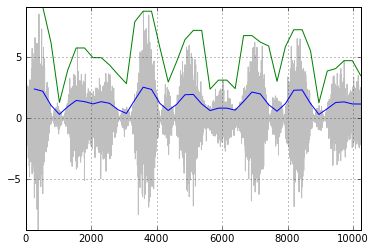

In [42]:
plot(x, color='grey', alpha=0.5)
plot(res['index'], res['rms'])
plot(res['index'], res['absmax'])
axis('tight')
grid(True)

In [43]:
import json

In [44]:
print(json.dumps(sink, indent=2, default=str))

{
  "absmax": [
    9.17553510198324,
    9.17553510198324,
    6.19729784624643,
    1.298019055801678,
    3.966418053026074,
    5.774181685391255,
    5.774181685391255,
    4.976003175901866,
    4.976003175901866,
    4.362891283177347,
    3.5843826442597244,
    2.8455096148698953,
    7.924953572283984,
    8.796358676819938,
    8.796358676819938,
    5.808376697705565,
    2.9749848950441855,
    4.644930777729553,
    6.459720234484151,
    7.221752810313926,
    7.221752810313926,
    2.390547476014788,
    3.130528575981757,
    3.130528575981757,
    2.4365037409841253,
    6.79103109773276,
    6.79103109773276,
    6.258287398665488,
    5.932994592903219,
    3.0311636716504733,
    5.888054334620736,
    7.2741504852464915,
    7.2741504852464915,
    5.535093252477868,
    1.2646687334903637,
    3.880011706155123,
    4.079465591237588,
    4.72906568174815,
    4.72906568174815,
    3.495275454663786
  ],
  "index": [
    256,
    512,
    768,
    1024,
    1280,